In [14]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Profit in $10000')

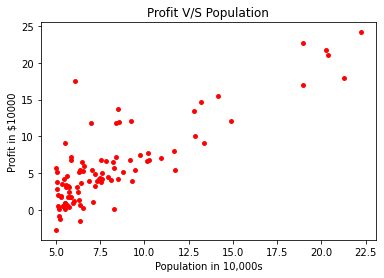

In [15]:
#Importing and Visualizing The Data
data = pd.read_csv("ex1data1.txt")

feature = data["Population"]
target = data["Profit"]


plt.scatter(feature, target, c ="red", s=15)
plt.title("Profit V/S Population")
plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in $10000")


In [16]:
#Converting the data in pandas to numpy array format
X = feature.to_numpy()

#Resizing the data 
X = np.resize(X, (97,1))

#Creating an array of "1's" to append
ones = np.ones((97,1))

#Final Feature array creation
X_feature = np.append(ones,X,axis=1)

#Converting target Data into numpy array
Y = target.to_numpy()
Y_target = np.resize(Y, (97,1))



In [17]:
#Parameter Initialization
iterations = 1500
theta = np.zeros((2,1))
alpha = 0.01

In [18]:
#Cost Funtion:
def cost_function(X,theta,Y):
    m = X.shape[0]
    avg = (1/(2*m))
    
    estimate = np.square(((np.dot(X,theta))-Y))
    sqr_estimate = np.sum(estimate)
    cost = avg * sqr_estimate
    return cost
        

In [19]:
def gradient_descent(theta,alpha,iterations,X,Y):
    m = X.shape[0]
    theta0 = np.zeros((iterations,1))
    theta1 = np.zeros((iterations,1))
    J_history = np.zeros((iterations,1))
    i = 0
    while i!=iterations:
        estimate = ((np.dot(X,theta))-Y)
        
        temp1 = (1/m) * np.sum(estimate)
        temp2 = (1/m) * np.sum(estimate * X)
        
        theta[0][0] = theta[0][0] - (alpha * temp1)
        theta0[i][0] = theta[0][0]
        theta[1][0] = theta[1][0] - (alpha * temp2)
        theta1[i][0] = theta[1][0]

        J_history[i][0] = cost_function(X,theta,Y)
        i+=1
    
    return J_history,theta0,theta1

In [20]:
cost,theta1,theta2 = (gradient_descent(theta,alpha,iterations,X_feature,Y_target))
print("h(x) ={} + {}x1".format((round(theta[0,0],2)),(round(theta[1,0],2))))

h(x) =-3.56 + 1.16x1


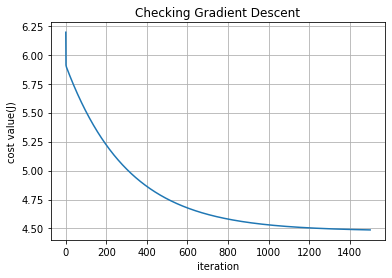

In [21]:
#Checking Gradient Descent
iter = np.arange(1,iterations+1)
iter = np.resize(iter,(iterations,1))

fig, ax = plt.subplots()
ax.plot(iter, cost)

ax.set(xlabel='iteration', ylabel='cost value(J)',
       title='Checking Gradient Descent')
ax.grid()

fig.savefig("test.png")
plt.show()

Text(0.5, 1.0, 'Linear regression with one variable')

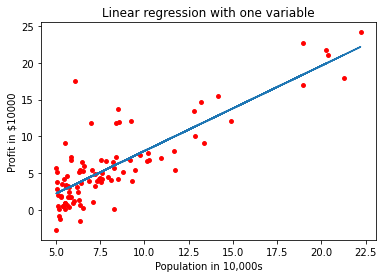

In [22]:
#Plotting the hypothesis
y = np.dot(X_feature,theta)
plt.scatter(feature, target, c ="red", s=15)
plt.plot(X,y)
plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in $10000")
plt.title("Linear regression with one variable")

In [23]:
#Doing Prediction
def predict(x,theta):
    predictions= np.dot(x,theta)
    return predictions[0]


predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = 35,000, a profit of ${} is predicted".format(round(predict1,0)))

predict2=predict(np.array([1,7]),theta)*10000
print("For population = 70,000, a profit of ${} is predicted".format(round(predict2,0)))

For population = 35,000, we predict a profit of $4970.0
For population = 70,000, we predict a profit of $45512.0
